## CS/CE 457/464 Homework 02

## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

# Part 1

In [475]:
import pandas as pd
import seaborn as sns                      
import matplotlib.pyplot as plt             
%matplotlib inline
pd.set_option('chained_assignment',None)

In [477]:
df = pd.read_csv('FIFA_Players_Data.csv')
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


In [479]:
df.count()

sofifa_id                   15465
short_name                  15465
long_name                   15465
age                         15465
dob                         15465
height_cm                   15465
weight_kg                   15465
nationality                 15465
club                        15465
overall                     15465
potential                   15465
player_positions            15465
preferred_foot              15465
international_reputation    15465
weak_foot                   15465
skill_moves                 15465
work_rate                   15465
body_type                   15465
real_face                   15465
release_clause_eur              0
team_position               15233
team_jersey_number          15233
joined                      14314
contract_valid_until        15226
nation_position              1056
nation_jersey_number         1056
pace                        13762
shooting                    13762
passing                     13762
dribbling     

In [481]:
#Dropping duplicates
df=df.drop_duplicates()
#df.count()

#Missing Vaalues
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
release_clause_eur          15465
team_position                 232
team_jersey_number            232
joined                       1151
contract_valid_until          239
nation_position             14409
nation_jersey_number        14409
pace                         1703
shooting                     1703
passing                      1703
dribbling     

#### Dropping rows having nation_position and team_position GK because it had all empty values for skills and it would introduce inaccuracies if imputed. Also drooping "release_clause_eur" column as it is all empty.

In [484]:
df = df.drop(['release_clause_eur'], axis = 1)
df = df[df['nation_position'] != 'GK']
df = df[df['team_position'] != 'GK']

df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,NaN,NaN,83.0,87.0,79.0,88.0,42.0,79.0,89,86


In [486]:
df.isnull().sum()

sofifa_id                       0
short_name                      0
long_name                       0
age                             0
dob                             0
height_cm                       0
weight_kg                       0
nationality                     0
club                            0
overall                         0
potential                       0
player_positions                0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
team_position                 224
team_jersey_number            224
joined                       1102
contract_valid_until          231
nation_position             13935
nation_jersey_number        13935
pace                         1131
shooting                     1131
passing                      1131
dribbling                    1131
defending     

#### Filling in missing values for the rest of the columns having null values using appropriate method

In [489]:
#df.isnull().sum()

#Using mode to fill in the missing values of categorical data

df['joined'].fillna(df['joined'].mode()[0], inplace=True)
df['nation_position'].fillna(df['nation_position'].mode()[0], inplace=True)
df['team_position'].fillna(df['team_position'].mode()[0], inplace=True)
df['contract_valid_until'].fillna(df['contract_valid_until'].mode()[0], inplace=True)

#Using median to fill in the missing values of ordinal data

df['team_jersey_number'].fillna(df['team_jersey_number'].median(), inplace=True)
df['nation_jersey_number'].fillna(df['nation_jersey_number'].median(), inplace=True)

#Using mean of the same attribute of players of same position to fill in the missing values of attributes

columns_to_fill = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for col in columns_to_fill:
    df[col] = df.groupby('team_position')[col].transform(lambda x: x.fillna(x.mean())).astype(int)

df.isnull().sum()

C:\Users\ryash\AppData\Local\Temp\ipykernel_16896\1650802976.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['joined'].fillna(df['joined'].mode()[0], inplace=True)
C:\Users\ryash\AppData\Local\Temp\ipykernel_16896\1650802976.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

sofifa_id                   0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
real_face                   0
team_position               0
team_jersey_number          0
joined                      0
contract_valid_until        0
nation_position             0
nation_jersey_number        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
skill_ball_control          0
power_stamina               0
dtype: int

#### Processing the values for skill_ball_control and power_stamina

In [492]:
#Function to evaluate +/- in the value, split, then apply operation
def resolve_operation(value):
    if '-' in value:
        parts = value.split('-')
        return int(parts[0]) - int(parts[1])
    elif '+' in value:
        parts = value.split('+')
        return int(parts[0]) + int(parts[1])
    else:
        return int(value)

#Apply the function to the desired columns
df['skill_ball_control'] = df['skill_ball_control'].apply(resolve_operation)
df['power_stamina'] = df['power_stamina'].apply(resolve_operation)

df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93,89,86,96,27,63,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93,93,81,91,32,79,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93,86,83,92,32,64,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76,91,81,86,34,86,90,78
5,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,SUB,12.0,83,87,79,88,42,79,89,86


In [494]:
#Converting it to CSV file 
df.to_csv('final_players_database.csv', index = False)

# Part 2 - EDA

In [498]:
df = pd.read_csv('final_players_database.csv')
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93,89,86,96,27,63,96,76
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93,93,81,91,32,79,89,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93,86,83,92,32,64,91,89
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76,91,81,86,34,86,90,78
4,176580,L. Suárez,Luis Alberto Suárez Díaz,27,1/24/1987,181,81,Uruguay,FC Barcelona,89,...,SUB,12.0,83,87,79,88,42,79,89,86


### Generating summaries and insights

In [501]:
#Generating a summary of players' nationalities

df.groupby('nationality').size().sort_values(ascending=False)

nationality
England       1527
Spain          986
France         844
Argentina      828
Italy          746
              ... 
Oman             1
Niger            1
Indonesia        1
Montserrat       1
Kuwait           1
Length: 146, dtype: int64

##### There are players from 146 different nationalities. The top 5 nationalities are: England (1527 players), Spain (986 players), France (844 players), Argentina (828 players), and Italy (746 players).

In [504]:
df.groupby('team_position').agg({
    'pace': 'mean',
    'shooting': 'mean',
    'passing': 'mean',
    'dribbling': 'mean',
    'defending': 'mean',
    'physic': 'mean'}).reset_index()

,team_position,pace,shooting,passing,dribbling,defending,physic
0,CAM,70.920863,63.805755,66.352518,70.410072,41.302158,61.010791
1,CB,57.119048,40.071429,49.761905,50.833333,66.357143,71.452381
2,CDM,61.677686,53.396694,65.041322,64.123967,65.644628,72.487603
3,CF,71.666667,74.111111,73.888889,78.222222,32.888889,66.888889
4,CM,63.410714,55.821429,64.553571,65.000000,57.982143,69.071429
5,LAM,77.684211,60.842105,63.578947,71.052632,39.315789,60.842105
6,LB,72.939096,46.534381,58.823183,62.667976,63.616896,68.895874
7,LCB,59.608696,38.561594,49.112319,49.313406,67.048913,72.739130
8,LCM,67.208202,58.315457,65.205047,66.324921,56.441640,67.886435
9,LDM,63.484018,55.328767,64.050228,64.324201,61.657534,70.246575


##### Attacking Players (Forwards, Wingers, CAMs, CFs): 
Pace is high (70–80) and dribbling is strong (65–73).
Shooting is notable (69–74), while defending is low (<40).
Physical stats are moderate (60–70).

##### Midfielders (CAMs, CMs, CDMs):
Balanced attributes with good pace (60–70), passing (64–66), and dribbling (64–70).
Defending is stronger for CDMs (~65) and physical stats are high (70+).

##### Defenders (CBs, LBs, RBs, LWB, RWB):
Strong defending (66–67) and physical stats (71–73).
Pace is decent (72–73), but shooting and dribbling are lower.

##### Key Points:
Wingers excel in pace, CFs in shooting and dribbling, CBs in defending.
Midfielders are well-rounded with good passing and physicality.

In [507]:
df.groupby('age').agg({'overall': ['mean', 'median'], 'potential': ['mean', 'median']}).reset_index()

age    overall         potential       
             mean median       mean median
0   16  54.103448   54.0  65.310345   64.0
1   17  54.350515   54.0  66.893471   66.0
2   18  55.624661   55.0  67.117886   67.0
3   19  57.901722   57.0  68.365755   68.0
4   20  60.001738   59.0  68.931364   68.0
5   21  61.949066   62.0  69.407470   69.0
6   22  62.897631   63.0  69.096447   69.0
7   23  64.251742   64.0  69.612369   69.0
8   24  64.917051   65.0  69.311521   69.0
9   25  65.902262   65.0  69.459729   69.0
10  26  66.212004   66.0  69.123911   68.0
11  27  66.639875   66.0  68.431106   68.0
12  28  67.128606   67.0  67.128606   67.0
13  29  67.297554   67.0  67.297554   67.0
14  30  67.158320   67.0  67.158320   67.0
15  31  66.865125   66.0  66.865125   66.0
16  32  67.414286   67.0  67.414286   67.0
17  33  67.508721   67.0  67.508721   67.0
18  34  66.894958   67.0  66.894958   67.0
19  35  66.828125   66.0  66.828125   66.0
20  36  65.827160   65.0  65.827160   65.0
21  37  66.333333   66.0  66.333333   66.0
22  38  65.925926   67.0  65.925926   67.0
23  39  67.375000   67.0  67.375000   67.0
24  40  63.000000   62.5  63.000000   62.5
25  41  62.600000   70.0  62.600000   70.0
26  42  59.250000   61.0  59.250000   61.0
27  43  78.000000   78.0  78.000000   78.0
28  44  51.000000   49.0  51.000000   49.0

##### As players age, their overall ratings generally show a consistent upward trend, indicating that experience and skill development significantly contribute to enhanced performance. However, while overall ratings continue to rise with age, the rate of improvement tends to decelerate as players approach their early 30s, likely due to factors such as physical decline or reduced adaptability. Data suggests that players tend to reach their peak performance around the age of 28, as this age group consistently has the highest average overall ratings. Additionally, the gap between current overall ratings and potential ratings diminishes over time, narrowing from a difference of around 10 in the late teens to nearly zero by the 40s.

### Univariate Analysis

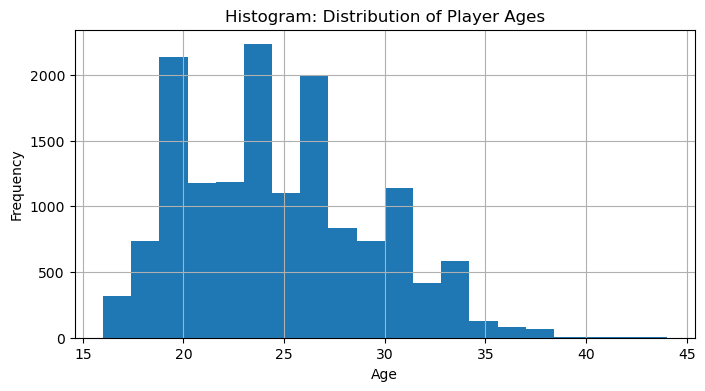

In [511]:
df['age'].hist(bins=20, figsize=(8, 4))
plt.title('Histogram: Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### The dataset includes players ranging from approximately 15 to 45 years old. The majority of players are in their late 20s, with a peak around age 27. The age distribution shows a slight right skew, suggesting that while there are some older players in their 30s and 40s, most players are younger.

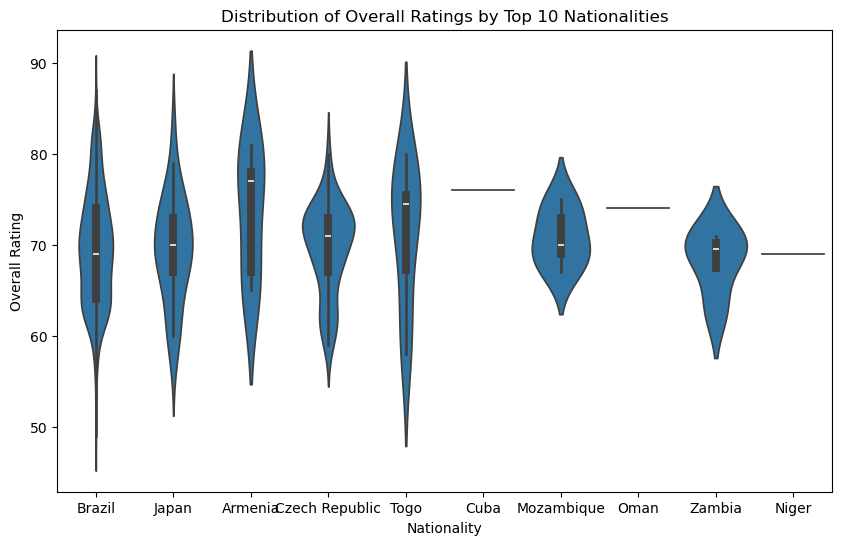

In [514]:
#Getting the top 10 nationalities having highest overall
top_10_nationalities = df.groupby('nationality')['overall'].mean().nlargest(10).index

#Filter the DataFrame to include only these top 10 nationalities
filtered_df = df[df['nationality'].isin(top_10_nationalities)]

#Generate the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='nationality', y='overall', data=filtered_df)
plt.title('Distribution of Overall Ratings by Top 10 Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.show()

##### The ratings of Brazilian players have the highest spread, indicating both many highly rated players and a wide variance in skills. Some nationalities like Zambia and Mozambique have shorter distributions, suggesting that players from these countries tend to have similar ratings. Japan displays a fairly concentrated distribution with ratings generally between 70 and 80.

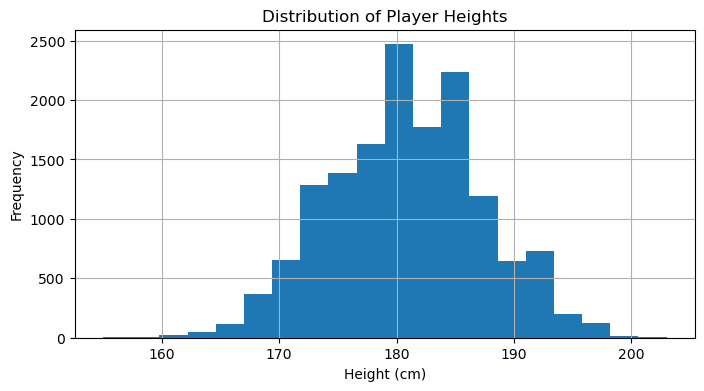

In [517]:
df['height_cm'].hist(bins=20, figsize=(8, 4))
plt.title('Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

##### The majority of players have heights ranging between 170 cm and 190 cm, with a peak around 179 cm. The distribution is slightly skewed to the left, indicating that there are relatively few players with heights between 160 cm and 170 cm. Overall, the dataset includes players with heights ranging from approximately 160 cm to 200 cm.

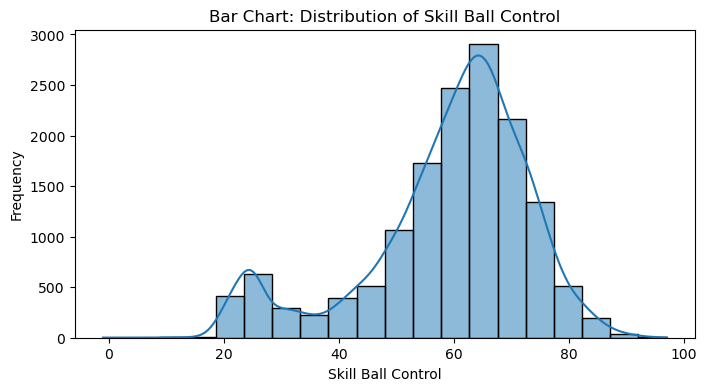

In [520]:
plt.figure(figsize=(8, 4))
sns.histplot(df['skill_ball_control'], bins=20, kde=True)
plt.title('Bar Chart: Distribution of Skill Ball Control')
plt.xlabel('Skill Ball Control')
plt.ylabel('Frequency')
plt.show()

##### The distribution is roughly bell-shaped and skewed slightly to the left, indicating more players have above-average ball control skills. Peak around the 60-70 range suggests this is the most common skill level. Also, there are a few players having skill level around 20-30 range who might be defenders, etc.

### Bivariate Analysis

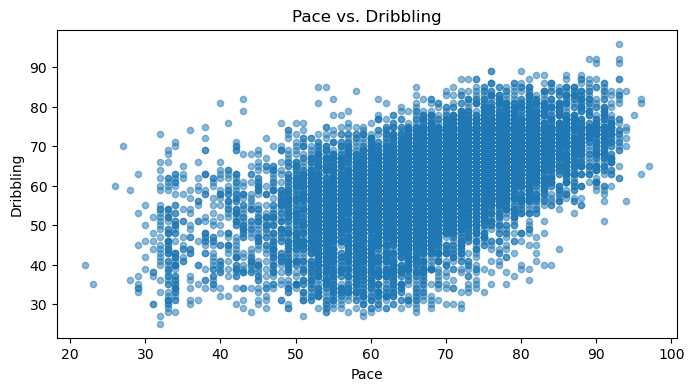

In [524]:
df.plot(kind='scatter', x='pace', y='dribbling', alpha=0.5, figsize=(8, 4))
plt.title('Pace vs. Dribbling')
plt.xlabel('Pace')
plt.ylabel('Dribbling')
plt.show()

##### The scatter plot indicates a positive correlation between pace and dribbling, although the relationship is not very strong or straightforward. While a higher pace generally allows for faster movement and potentially easier dribbling, dribbling ability is also influenced by other factors such as agility, height, and fitness.

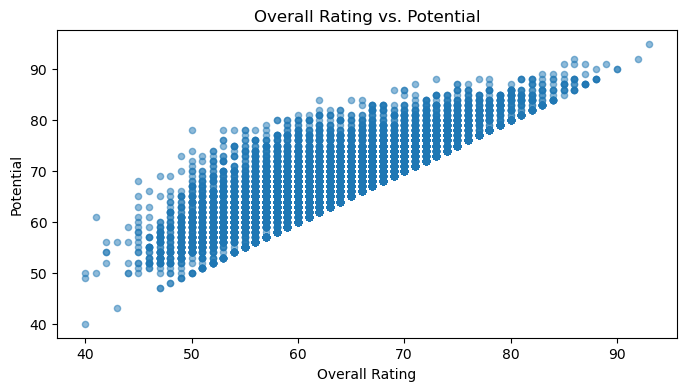

In [322]:
df.plot(kind='scatter', x='overall', y='potential', alpha=0.5, figsize=(8, 4))
plt.title('Overall Rating vs. Potential')
plt.xlabel('Overall Rating')
plt.ylabel('Potential')
plt.show()

##### This scatter plot reveals that the gap between current overall ratings and potential ratings narrows as the overall rating increases. Players with lower overall ratings (50-60) have greater potential for performance improvement compared to those who are already performing well with higher overall ratings.

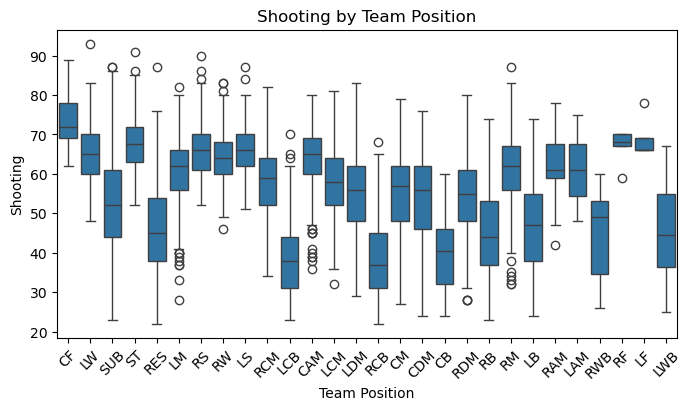

In [548]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='team_position', y='shooting', data=df)
plt.title('Shooting by Team Position')
plt.xlabel('Team Position')
plt.ylabel('Shooting')
plt.xticks(rotation=45)
plt.show()

##### Each box in the plot represents the interquartile range (IQR), encompassing the middle 50% of the data. The line within each box marks the median shooting score. The whiskers extend to display the data range, excluding outliers, while dots indicate outliers—values that are significantly different from the rest of the data. This box plot illustrates that attacking positions generally have higher shooting scores compared to other positions.

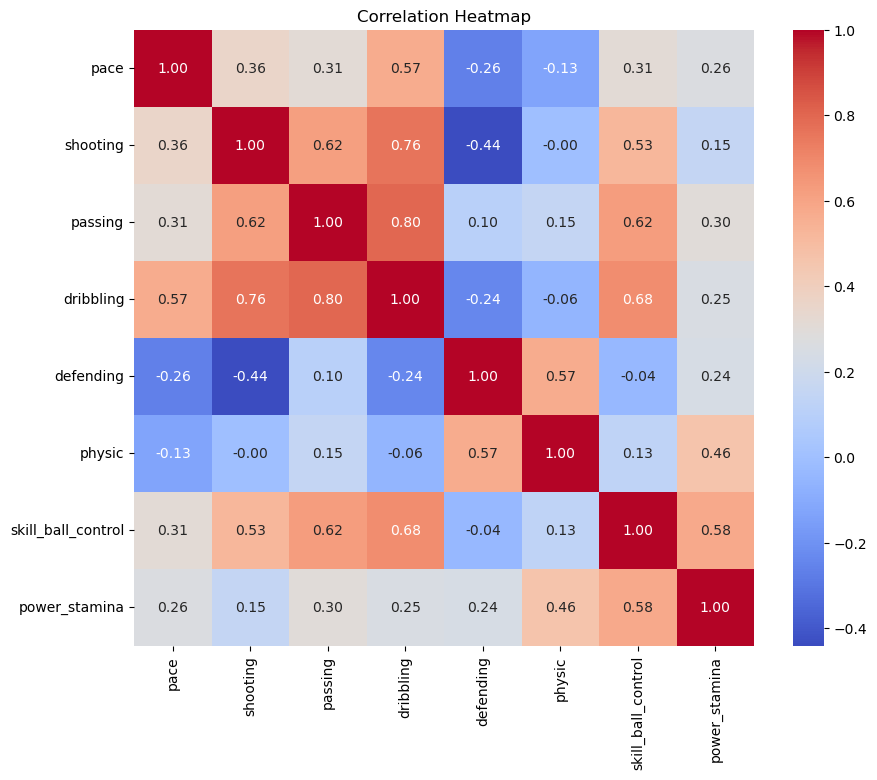

In [551]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['pace','shooting','passing','dribbling','defending','physic','skill_ball_control', 'power_stamina']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### This heatmap illustrates the correlations between various attributes. For instance, there is a strong correlation between passing and dribbling, while the correlation between shooting and defending is relatively weak.

### Multivariate Analysis

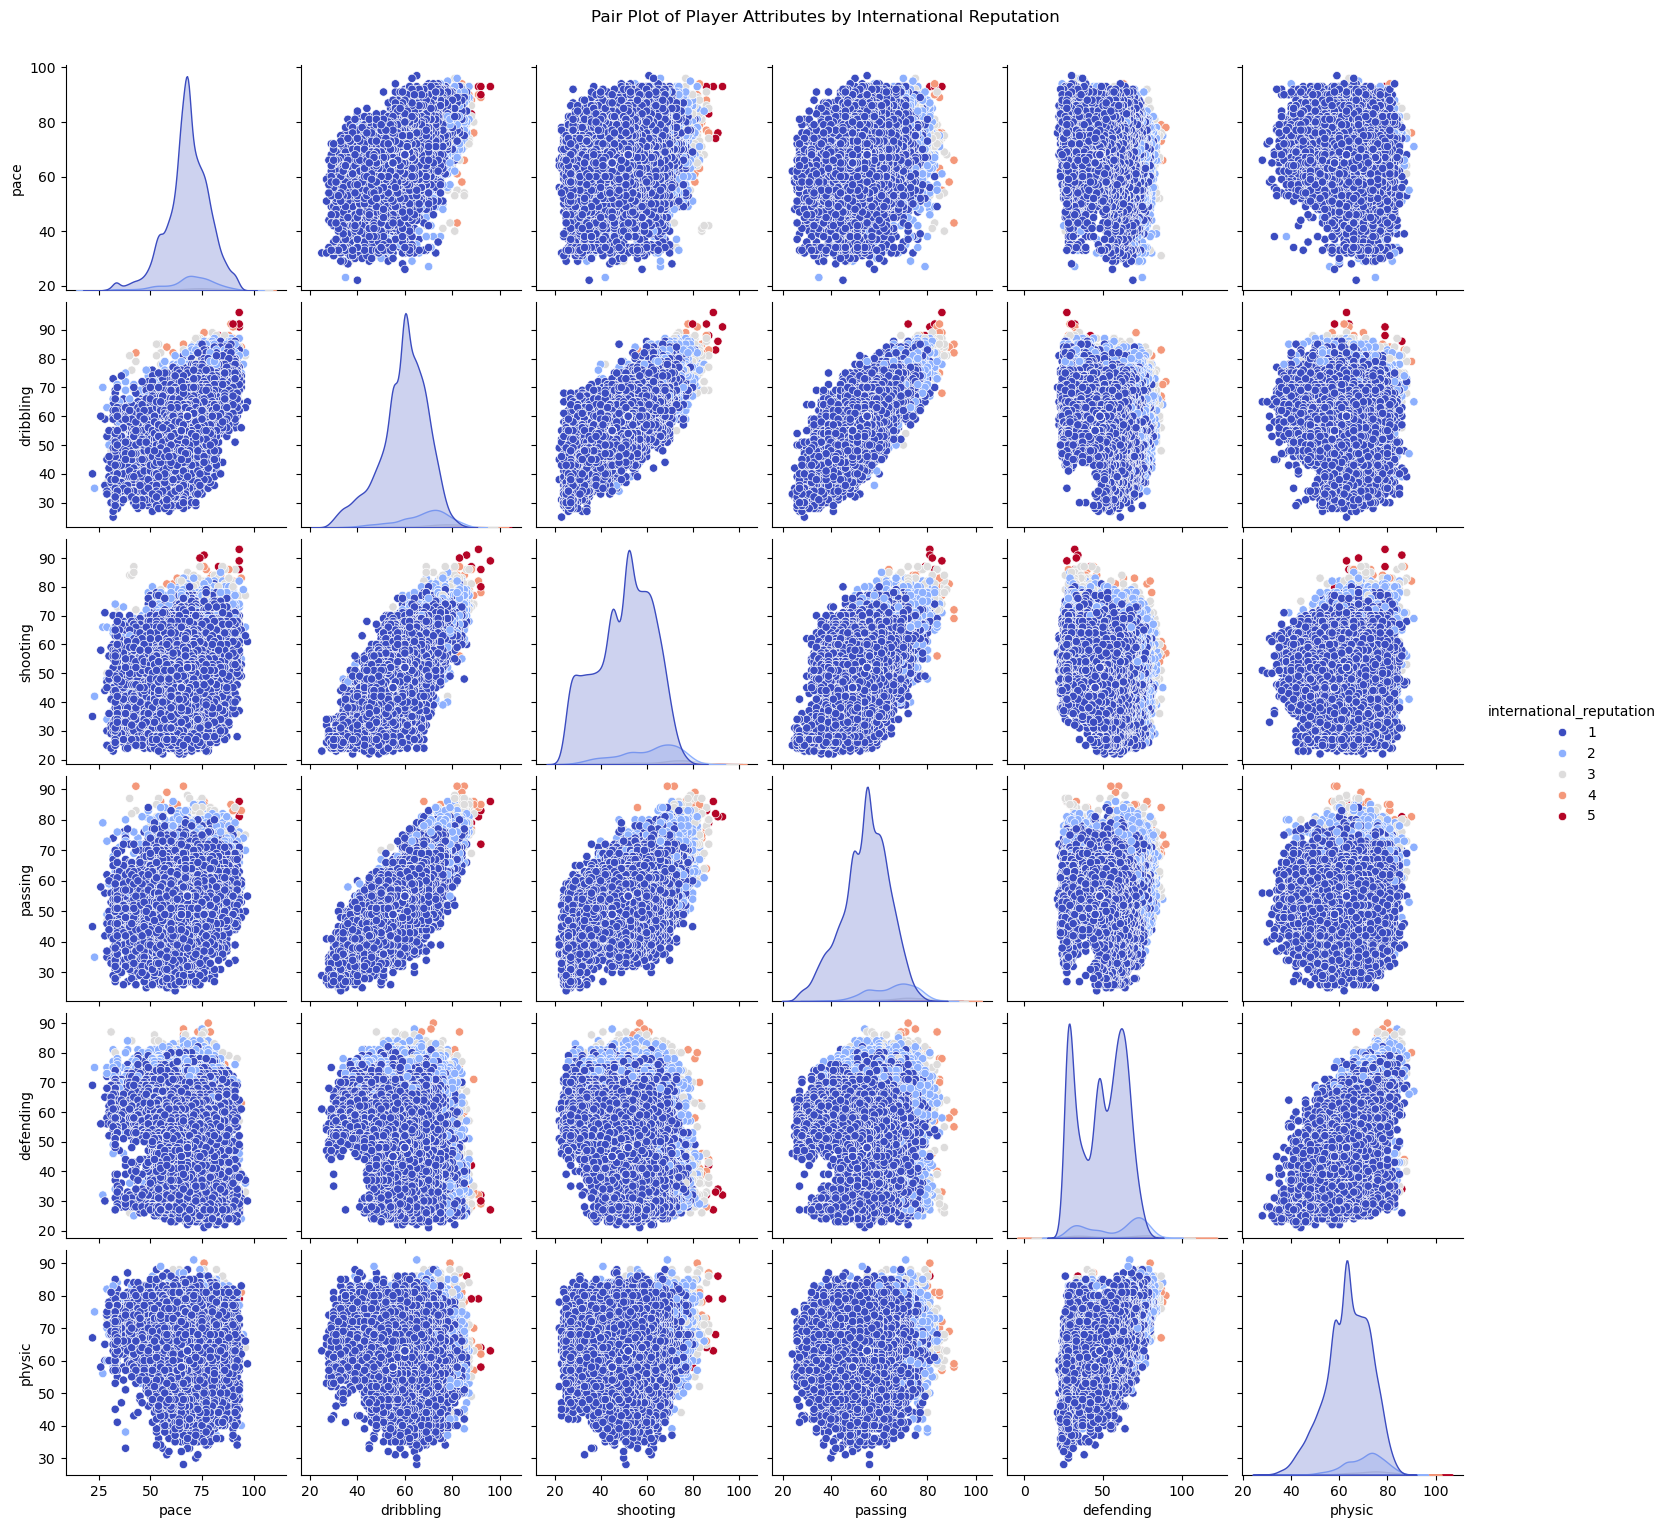

In [556]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting attributes and international reputation
pairplot_columns = ['pace', 'dribbling', 'shooting', 'passing', 'defending', 'physic', 'international_reputation']

# Create a pairplot
sns.pairplot(df[pairplot_columns], hue='international_reputation', palette='coolwarm')
plt.suptitle('Pair Plot of Player Attributes by International Reputation', y=1.02)
plt.show()


##### The pair plot visualizes the relationships between various player attributes and their international reputation. It features scatter plots for each pair of attributes, showing how they correlate with each other, and histograms or KDE plots on the diagonal that reveal the distribution of each attribute. The color-coding, based on international reputation, highlights how different reputation levels are associated with the attributes. By analyzing the pair plot, you can identify patterns, correlations, and trends, such as whether higher-reputation players generally exhibit better skills in certain attributes or if specific attributes are correlated with each other.